## EDA: Covtype Dataset Insights

### Dataset Overview
The Covtype dataset contains forest cover type classification data with multiple features describing forest characteristics.

### Initial Steps
1. **DATASET OVERVIEW** - Check shape, basic info, first/last rows, Mean, median, std, min, max, quantiles
2. **DATA TYPES & FEATURE CLASSIFICATION** - Identify numerical vs categorical features
3. **MISSING VALUES** - Check for null/NaN values


### Exploratory Data Analysis
4. **OUTLIERS DETECTION (for numerical features)** - Find the upper and lower bound and see how many samples fall outside this distribution
5. **VISUALIZE NUMERICAL FEATURES** - Plot histograms and boxplot for numerical features
6. **CORRELATION ANALYSIS** - Correlation Matrix for all of the numerical features
7. **CLASS DISTRIBUTION** - Check whether the output variable is impalanced
8. **REPEAT ANALYZE CLASS IMBALANCE** - Dataset is higly imbalanced
9. **CORRELATION ANALYSIS** - Correlation Matrix for all of the numerical features
10. **CLASS DISTRIBUTION** - Check whether the output variable is impalanced

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from collections import Counter

In [2]:
df_covtype = pd.read_csv('../Data/covtype_train.csv')
df_covtype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58096,3160,315,8,0,0,1366,199,234,174,1129,...,0,0,0,0,0,0,0,0,0,1
58097,2607,45,12,242,52,977,223,214,123,1342,...,0,0,0,0,0,0,0,0,0,2
58098,2317,280,25,190,64,433,144,233,225,582,...,0,0,0,0,0,0,0,0,0,3
58099,3183,89,17,60,8,3443,243,211,91,443,...,0,0,0,0,0,0,0,0,0,1


In [3]:

# 1. Get an overview of the dataset
print(f"Shape: {df_covtype.shape}")
print(df_covtype.describe())

Shape: (58101, 55)
          Elevation        Aspect         Slope  \
count  58101.000000  58101.000000  58101.000000   
mean    2961.095695    156.183508     14.113045   
std      279.091350    112.026044      7.475782   
min     1871.000000      0.000000      0.000000   
25%     2810.000000     59.000000      9.000000   
50%     2997.000000    127.000000     13.000000   
75%     3165.000000    262.000000     18.000000   
max     3846.000000    360.000000     62.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      58101.000000                    58101.000000   
mean                         269.666649                       46.146831   
std                          212.153471                       57.974062   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       29.000000

In [4]:
# 2. Get the datatypes and feature classifications
numerical_features = df_covtype.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_covtype.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical Features ({len(numerical_features)})")
print(f"Categorical Features ({len(categorical_features)})")

Numerical Features (55)
Categorical Features (0)


In [5]:
# 3. Check for missing values
missing_values = df_covtype.isnull().sum()
missing_percent = (missing_values / len(df_covtype)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df

,Missing Count,Missing Percentage
Elevation,0,0.0
Aspect,0,0.0
Slope,0,0.0
Horizontal_Distance_To_Hydrology,0,0.0
Vertical_Distance_To_Hydrology,0,0.0
Horizontal_Distance_To_Roadways,0,0.0
Hillshade_9am,0,0.0
Hillshade_Noon,0,0.0
Hillshade_3pm,0,0.0
Horizontal_Distance_To_Fire_Points,0,0.0


In [6]:
# 4.Check for outliers (for numerical features)
def detect_outliers_iqr(data, column):
    Lower_Bound_Value = data[column].quantile(0.25)
    Upper_Bound_Value = data[column].quantile(0.75)
    IQR = Upper_Bound_Value - Lower_Bound_Value
    # Multiplier 1.5 for convention
    lower_bound = Lower_Bound_Value - 1.5 * IQR
    upper_bound = Upper_Bound_Value + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = {}
for col in numerical_features:
    outlier_count, lower, upper = detect_outliers_iqr(df_covtype, col)
    outlier_summary[col] = {'count': outlier_count, 'lower_bound': lower, 'upper_bound': upper}
    
pd.DataFrame(outlier_summary)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,1507.0,0.0,1543.0,1316.0,3232.0,56.0,1740.0,1523.0,713.0,3063.0,...,5288.0,4517.0,155.0,180.0,8.0,31.0,1561.0,1367.0,908.0,4949.0
lower_bound,2277.5,-245.5,-4.5,-315.0,-84.5,-2231.5,148.5,177.0,44.0,-1271.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5
upper_bound,3697.5,566.5,31.5,813.0,159.5,6668.5,280.5,273.0,244.0,4849.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5


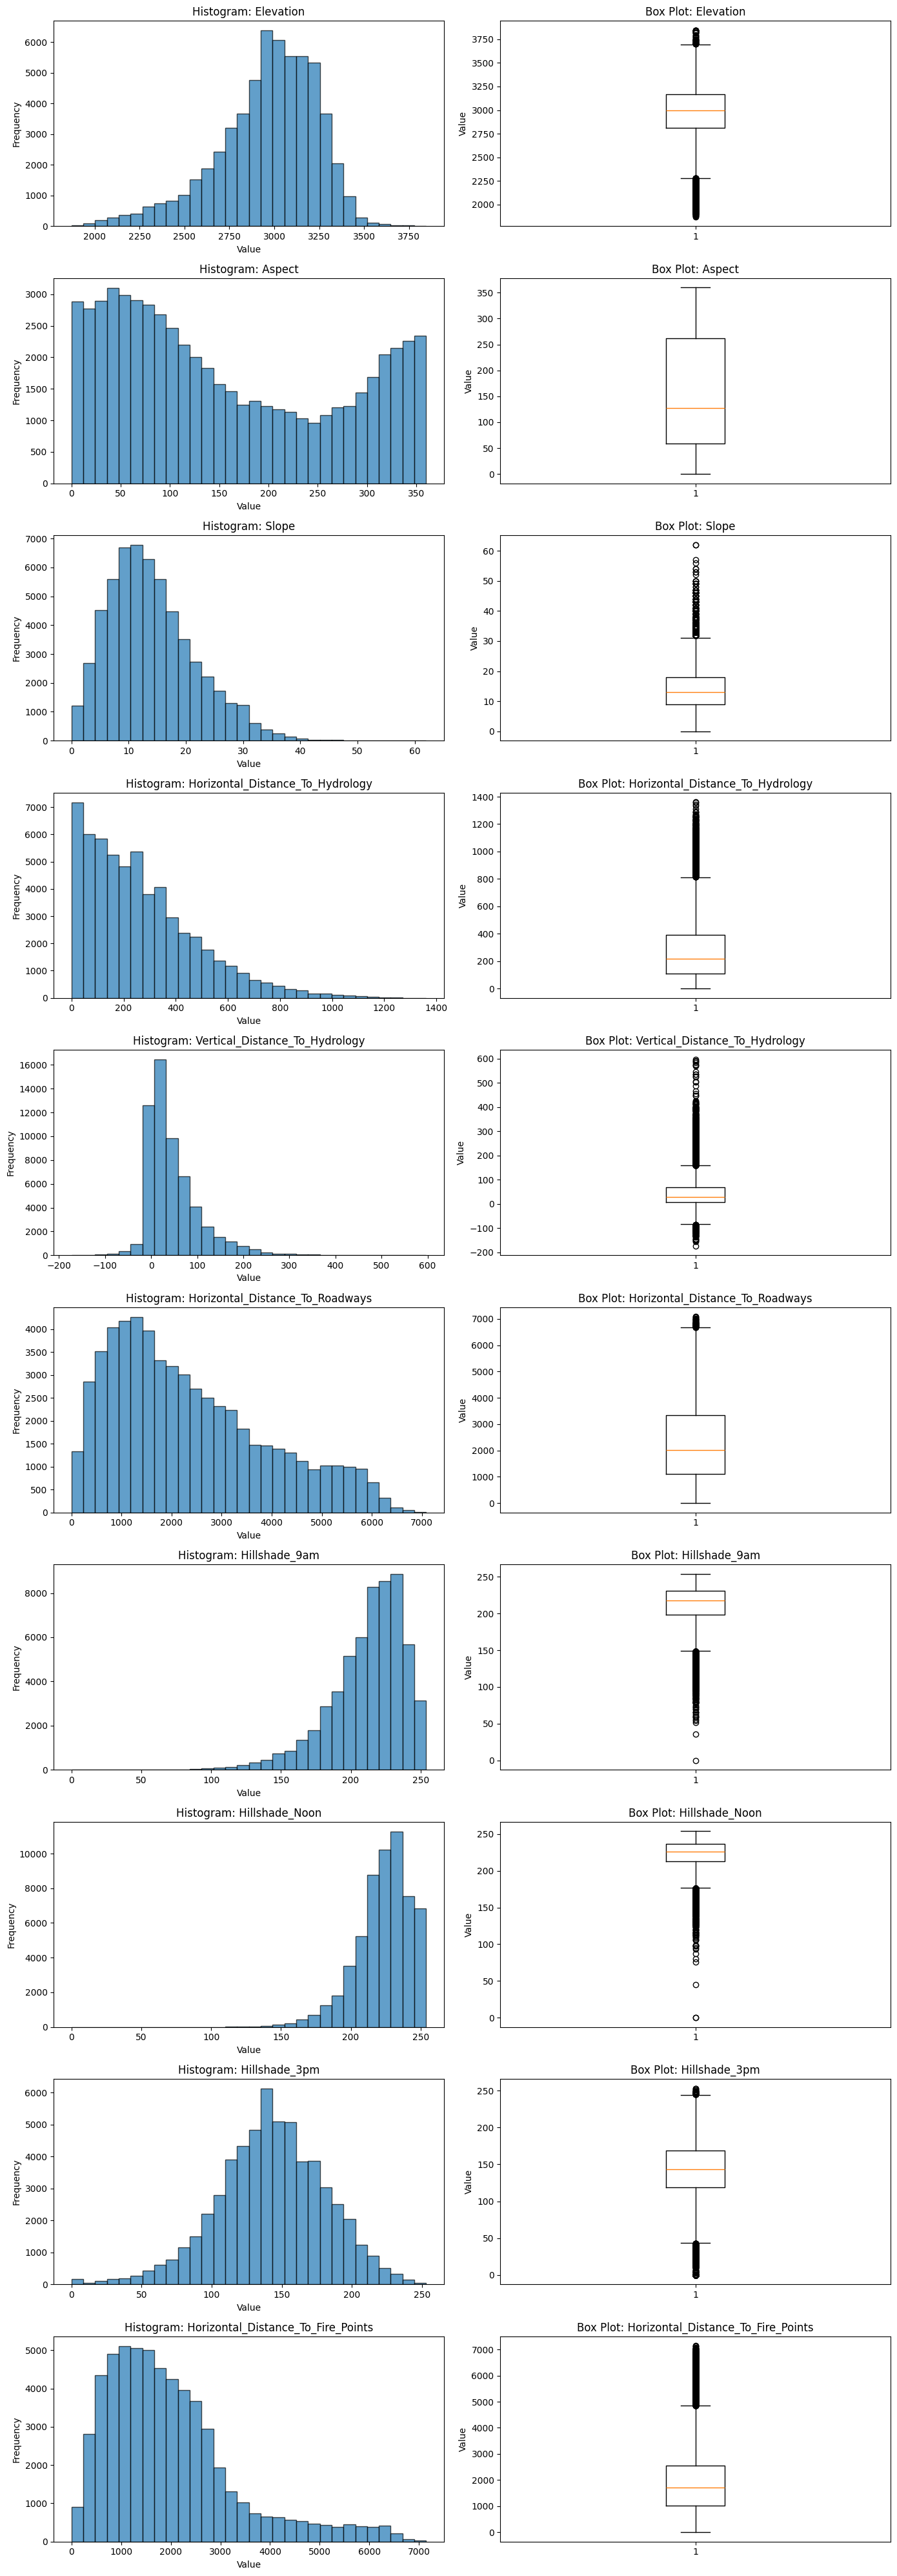

In [7]:
# 5. Plot graphs and visualize
#Only take the numerical features that are continuous
numerical_features = numerical_features[:10]

fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 4*len(numerical_features)))
if len(numerical_features) == 1:
    axes = axes.reshape(1, -1)
    
for idx, col in enumerate(numerical_features):
    # Histogram
    axes[idx, 0].hist(df_covtype[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'Histogram: {col}')
    axes[idx, 0].set_xlabel('Value')
    axes[idx, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[idx, 1].boxplot(df_covtype[col])
    axes[idx, 1].set_title(f'Box Plot: {col}')
    axes[idx, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

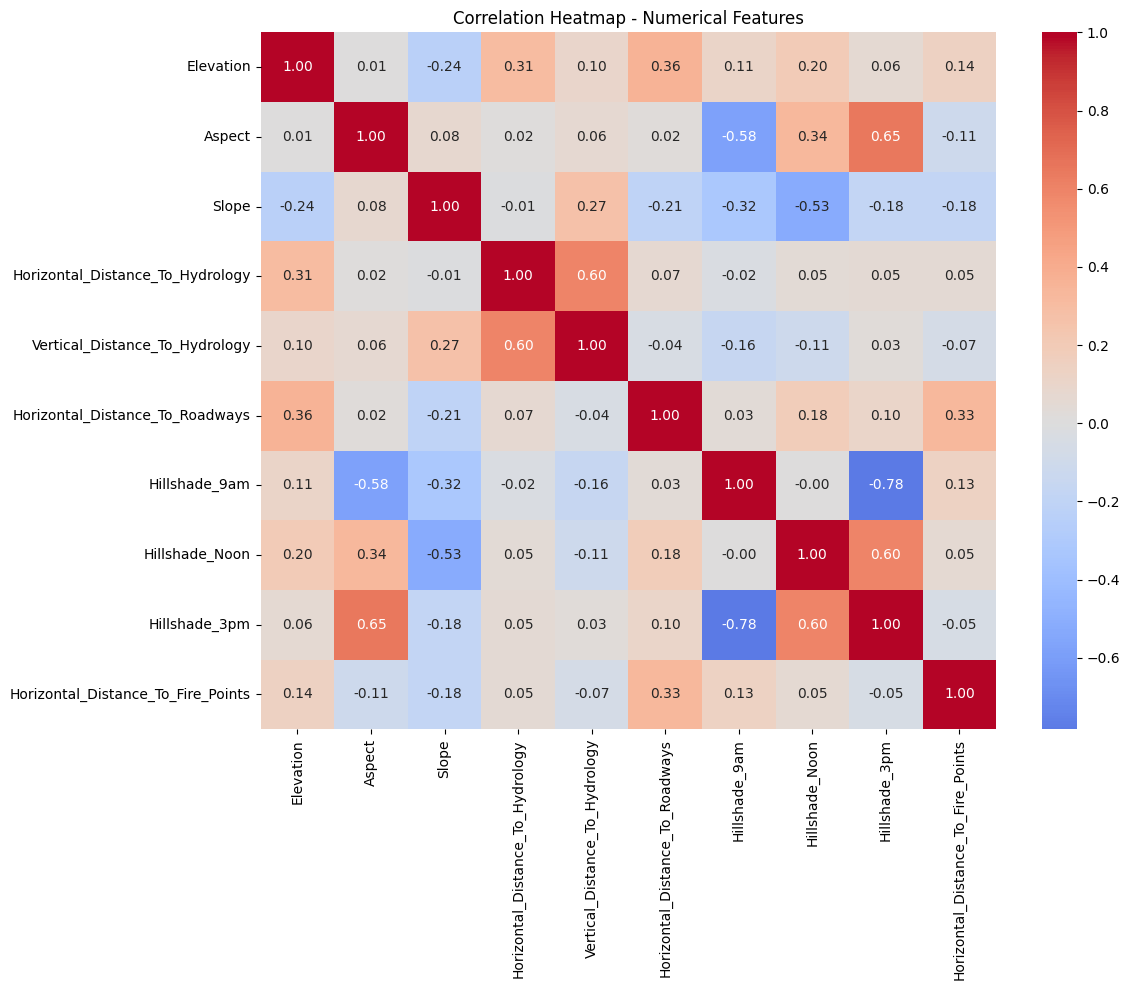

In [8]:
# 6. CORRELATION ANALYSIS
if len(numerical_features) > 1:
    correlation_matrix = df_covtype[numerical_features].corr()

    # correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap - Numerical Features')
    plt.tight_layout()
    plt.show()


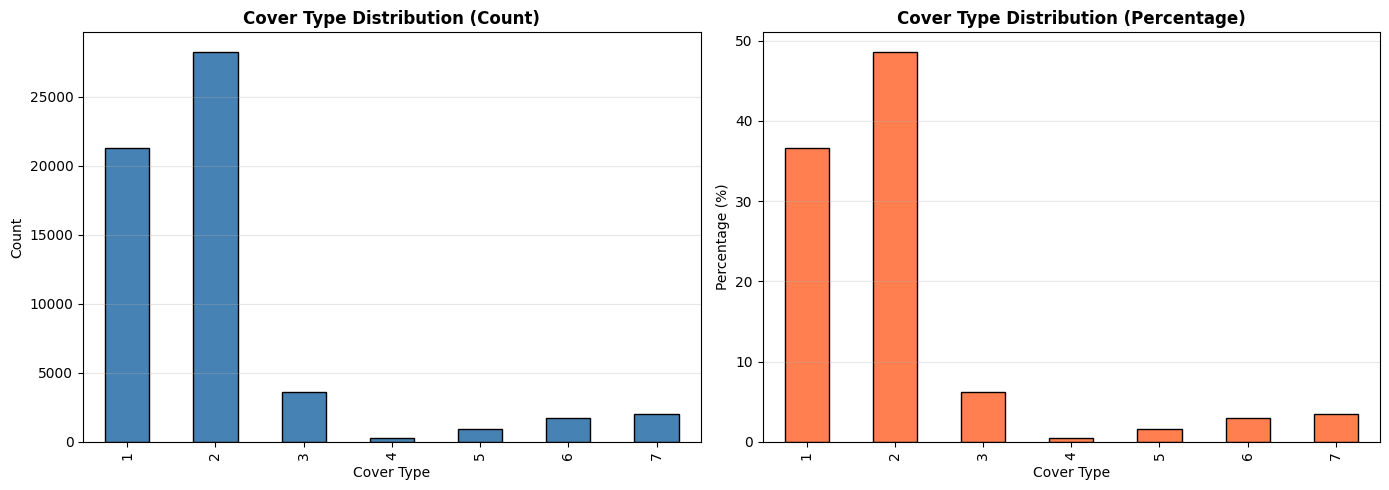

28248
259


In [9]:

# 7. Check for imbalanced dataset
class_counts = df_covtype['Cover_Type'].value_counts().sort_index()
class_percentages = (df_covtype['Cover_Type'].value_counts(normalize=True).sort_index() * 100)
df_distribution = pd.concat([class_counts, class_percentages], axis=1)

df_distribution

# # Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

df_distribution['count'].plot(kind='bar', ax=ax1, edgecolor='black', color='steelblue')
ax1.set_title('Cover Type Distribution (Count)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

df_distribution['proportion'].plot(kind='bar', ax=ax2, edgecolor='black', color='coral')
ax2.set_title('Cover Type Distribution (Percentage)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Cover Type')
ax2.set_ylabel('Percentage (%)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

max_class_count = class_counts.max()
print(max_class_count)
min_class_count = class_counts.min()
print(min_class_count)

In [10]:
# 8. Validate binary columns
wilderness_cols = np.where(df_covtype.columns.str.contains('Wilderness_Area'))
wilderness_cols = df_covtype.columns[wilderness_cols[0]].tolist()

soil_indices = np.where(df_covtype.columns.str.contains('Soil_Type'))
soil_type_cols = df_covtype.columns[soil_indices[0]].tolist()

unique_values = {}
counter = 0

for col in wilderness_cols + soil_type_cols:
    values = set(df_covtype[col].unique())
    if not values.issubset({0, 1}):
        print(f"Not all binary: {col, values}")
        Counter += 1
if counter == 0:
    print("All binary")

All binary


In [11]:
# 9. Normlaize and Standardize dataset due to imbalanced dataset
# Identify numerical features (exclude binary features and target)
exclude_cols = wilderness_cols + soil_type_cols + ["Cover_Type"]

numerical_features = [col for col in df_covtype.columns if col not in exclude_cols and df_covtype[col].dtype in ['int64', 'float64']]

print(len(numerical_features))
print(numerical_features)

print("Statistics Before Scaling:")
Stats_before_scaling_normalizing = pd.DataFrame(df_covtype[numerical_features].describe())
Stats_before_scaling_normalizing

# Create copies for scaling and normalizing
df_scaled_covtype = df_covtype.copy()
df_normalized_covtype = df_covtype.copy()


10
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Statistics Before Scaling:


Standardization and Normalization

In [12]:
# standardization
scaler_standard = StandardScaler()
df_scaled_covtype[numerical_features] = scaler_standard.fit_transform(df_covtype[numerical_features])

print("Statistics After Standardization:")
Standardized_df = pd.DataFrame(df_scaled_covtype[numerical_features].describe())
Standardized_df


# normalziation
scaler_minmax = MinMaxScaler()
df_normalized_covtype[numerical_features] = scaler_minmax.fit_transform(df_covtype[numerical_features])

print("Statistics After Normalization:")
Normalized_df = pd.DataFrame(df_normalized_covtype[numerical_features].describe())
Normalized_df

Statistics After Standardization:
Statistics After Normalization:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,0.551947,0.433843,0.227630,0.198139,0.284606,0.331735,0.835424,0.879266,0.563130,0.277774
std,0.141312,0.311183,0.120577,0.155881,0.075291,0.219985,0.105301,0.077727,0.152129,0.185312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475443,0.163889,0.145161,0.079353,0.233766,0.156060,0.779528,0.838583,0.470356,0.143317
50%,0.570127,0.352778,0.209677,0.160176,0.262338,0.283195,0.858268,0.889764,0.565217,0.240168
75%,0.655190,0.727778,0.290323,0.286554,0.312987,0.470016,0.909449,0.933071,0.667984,0.357453
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plots for standardization and Normalization

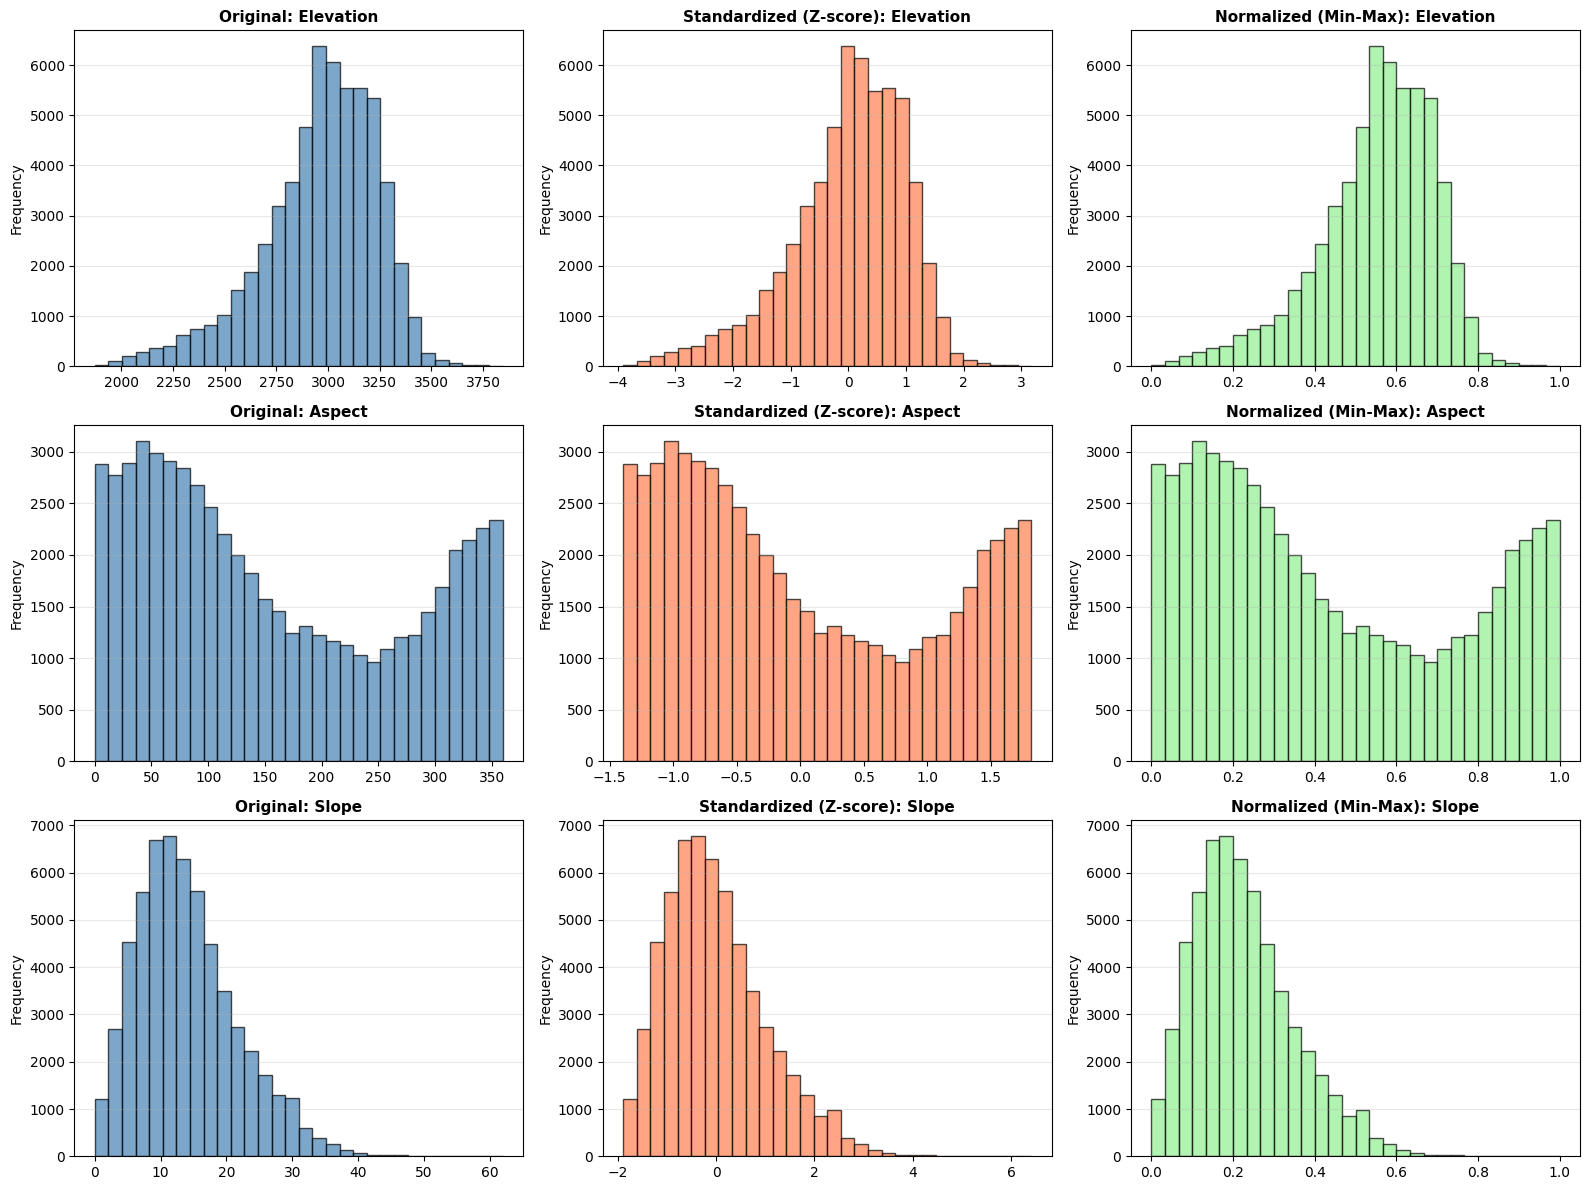

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
sample_features = numerical_features[:3]

for idx, feature in enumerate(sample_features):
    # Original
    axes[idx, 0].hist(df_covtype[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx, 0].set_title(f'Original: {feature}', fontweight='bold', fontsize=11)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # standardized data
    axes[idx, 1].hist(df_scaled_covtype[feature], bins=30, edgecolor='black', alpha=0.7, color='coral')
    axes[idx, 1].set_title(f'Standardized (Z-score): {feature}', fontweight='bold', fontsize=11)
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].grid(axis='y', alpha=0.3)

    # Normalized
    axes[idx, 2].hist(df_normalized_covtype[feature], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[idx, 2].set_title(f'Normalized (Min-Max): {feature}', fontweight='bold', fontsize=11)
    axes[idx, 2].set_ylabel('Frequency')
    axes[idx, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



df_scaled_covtype.to_csv("../Data_Preprocessed/covtype_scaled.csv", index=False)
df_normalized_covtype.to_csv("../Data_Preprocessed/covtype_normalized.csv", index=False)

In [16]:
df_scaled_covtype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1.397061,0.444691,1.723842,2.150977,1.342908,0.937764,-0.755163,1.452010,0.975053,0.216235,...,0,0,0,0,0,0,1,0,0,1
1,-0.820870,-0.242656,-0.951486,-0.271818,-0.778749,-0.813978,0.702992,0.641577,-0.142168,-0.810166,...,0,0,0,0,0,0,0,0,0,2
2,-1.394164,-1.179946,-0.683954,-0.323668,-0.364767,-0.894157,0.142163,-0.067553,-0.012259,0.155814,...,0,0,0,0,0,0,0,0,0,2
3,-0.491226,-0.778250,-0.148888,0.694472,-0.123277,0.559321,0.777769,-0.472769,-0.843679,3.393623,...,0,0,0,0,0,0,0,0,0,2
4,-1.548236,-0.644351,-1.219019,-0.705470,-0.640755,-0.807564,0.553438,0.388316,-0.090204,2.264506,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58096,0.712691,1.417687,-0.817720,-1.271103,-0.795998,-0.631812,-0.493443,0.540272,0.819162,-0.646274,...,0,0,0,0,0,0,0,0,0,1
58097,-1.268756,-0.992488,-0.282654,-0.130410,0.100963,-0.881328,0.403883,-0.472769,-0.505914,-0.485403,...,0,0,0,0,0,0,0,0,0,2
58098,-2.307851,1.105257,1.456309,-0.375517,0.307954,-1.230266,-2.549817,0.489620,2.144237,-1.059402,...,0,0,0,0,0,0,0,0,0,3
58099,0.795102,-0.599718,0.386178,-0.988287,-0.658004,0.700436,1.151655,-0.624726,-1.337335,-1.164384,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# 10. HANDLE CLASSIMBALANCE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Select on which dataset to use

data = "Normal"
# data = "Standardized"
# data = "Normalized"

#separate features and target


if data.lower() == "normal":
    X = df_covtype.drop(['Cover_Type'], axis=1)
    y = df_covtype['Cover_Type']
    print(f"Using original (raw) features")
    
elif data.lower() == "standardized":
    X = df_scaled_covtype.drop(['Cover_Type'], axis=1)
    y = df_scaled_covtype['Cover_Type']
    print(f"Using standardized features (StandardScaler)")
    
elif data.lower() == "normalized":
    X = df_normalized_covtype.drop(['Cover_Type'], axis=1)
    y = df_normalized_covtype['Cover_Type']
    print(f"Using normalized features (MinMaxScaler)")
    

# Train/Test Split (BEFORE resampling to maintain realistic evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set: {X_train['Elevation'].count()}")
print(F"Test set size: {X_test['Elevation'].count()}")

# SMOTE
original_total = len(y)
max_class = class_counts.max()
target_ratio = 0.6

smote_strategy = {
    cls: int(max_class * target_ratio)
    for cls in y.unique()
    if (y == cls).sum() < max_class * target_ratio
}
X_approach = X.copy()
y_approach = y.copy()

smote = SMOTE(sampling_strategy=smote_strategy, random_state=42, k_neighbors=5)
X_approach, y_approach = smote.fit_resample(X_approach, y_approach)


Using original (raw) features
Train set: 46480
Test set size: 11621


In [15]:
X_resampled_final = X_approach.copy()
y_resampled_final = y_approach.copy()

df_covtype_final = X_resampled_final.copy()
df_covtype_final['Cover_Type'] = y_resampled_final.values

print(f"Combined dataset shape: {df_covtype_final.shape}")
print(f"Class distribution:\n{df_covtype_final['Cover_Type'].value_counts().sort_index()}")

max_count = y_approach.value_counts().max()

max_class = y_approach.value_counts().idxmax() 
target_majority = int(max_count * 0.85)

undersample_strategy = {
    max_class: target_majority
}

undersample = RandomUnderSampler(
    sampling_strategy=undersample_strategy,
    random_state=42
)

X_approach, y_approach = undersample.fit_resample(X_approach, y_approach)

X_resampled_final = X_approach.copy()
y_resampled_final = y_approach.copy()
print("\n")
print(y_resampled_final.value_counts().sort_index())
print(max_class, max_count)

Combined dataset shape: (134285, 55)
Class distribution:
Cover_Type
1    21297
2    28248
3    16948
4    16948
5    16948
6    16948
7    16948
Name: count, dtype: int64


Cover_Type
1    21297
2    24010
3    16948
4    16948
5    16948
6    16948
7    16948
Name: count, dtype: int64
2 28248
